<a href="https://colab.research.google.com/github/Sahil-Jagadale/DL/blob/main/DL_FeedForward_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

In [2]:
from tensorflow.keras import models, layers, optimizers, datasets

In [3]:
(train_x,train_y), (test_x,test_y) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
train_x = train_x.reshape((train_x.shape[0],32*32*3))
test_x = test_x.reshape((test_x.shape[0],32*32*3))

In [5]:
lb = LabelBinarizer()

train_y = lb.fit_transform(train_y)
test_y = lb.fit_transform(test_y)

In [6]:
train_x = train_x.astype('float32')/255.0
test_x = test_x.astype('float32')/255.0

In [29]:
model = models.Sequential()


model.add(layers.Dense(512, activation='sigmoid', input_shape=(32*32*3,)))

model.add(layers.Dense(10, activation='sigmoid'))

model.summary()

output_layer_weights = model.layers[-1].get_weights()[0]
print("Output layer weights shape: ",output_layer_weights.shape)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

Output layer weights shape:  (512, 10)


In [31]:
model.compile(optimizer=optimizers.SGD(), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=11, batch_size=128, validation_data=(test_x,test_y))

Epoch 1/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.3003 - loss: 0.2992 - val_accuracy: 0.3127 - val_loss: 0.2976
Epoch 2/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.3087 - loss: 0.2975 - val_accuracy: 0.3179 - val_loss: 0.2965
Epoch 3/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.3118 - loss: 0.2967 - val_accuracy: 0.3204 - val_loss: 0.2955
Epoch 4/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.3145 - loss: 0.2956 - val_accuracy: 0.3191 - val_loss: 0.2946
Epoch 5/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.3170 - loss: 0.2948 - val_accuracy: 0.3263 - val_loss: 0.2937
Epoch 6/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.3148 - loss: 0.2942 - val_accuracy: 0.3278 - val_loss: 0.2928
Epoch 7/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.3193 - loss: 0.2929 - val_accuracy: 0.3296 - val_loss: 0.2921
Epoch 8/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.3180 - loss: 0.2926 - v

In [32]:
prediction = model.predict(test_x)

pre_class = prediction.argmax(axis=1)
true_class = test_y.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


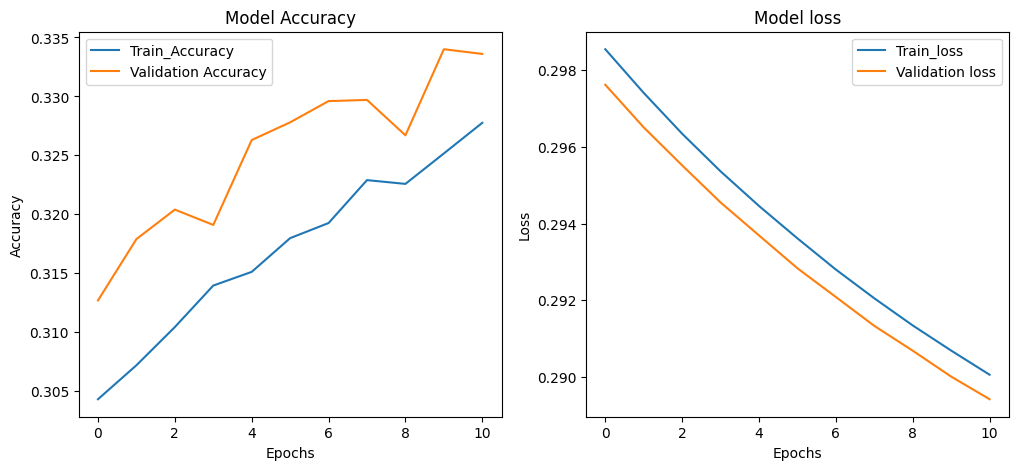

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train_Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train_loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [34]:
report = classification_report(true_class,pre_class)
print(report)

              precision    recall  f1-score   support

           0       0.38      0.49      0.43      1000
           1       0.36      0.30      0.33      1000
           2       0.27      0.13      0.18      1000
           3       0.25      0.12      0.16      1000
           4       0.33      0.21      0.26      1000
           5       0.29      0.37      0.33      1000
           6       0.31      0.48      0.38      1000
           7       0.33      0.22      0.27      1000
           8       0.37      0.55      0.44      1000
           9       0.35      0.47      0.40      1000

    accuracy                           0.33     10000
   macro avg       0.32      0.33      0.32     10000
weighted avg       0.32      0.33      0.32     10000

